In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from scipy.integrate import odeint

In [70]:
#Part a

print 'Mr is the integral of 4pi*r^2*rho dr from 0 to r'
print 'dMdr then = 4pi*r^2*rho(P,T)'

Mr is the integral of 4pi*r^2*rho dr from 0 to r
dMdr then = 4pi*r^2*rho(P,T)


In [12]:
#Part b

print 'dP/dr = -GM/r^2*rho'

dP/dr = -GM/r^2*rho


In [14]:
#Part c

print 'L = epsilon*rho*4/3*pi*r^2'
print 'dL/dr = 4pi*r^2*rho*epsilon'



L = epsilon*rho*4/3*pi*r^2
dL/dr = 4pi*r^2*rho*epsilon


In [16]:
#Part d

print 'dT/dr = -3/(4ac)*(kappa*rho)/(T**3)*(L/(4pi*r^2))'

dT/dr = -3/(4ac)*(kappa*rho)/(T**3)*(L/(4pi*r*2))


In [21]:
#Part e

print 'M(r=0) = 0, M(r=R) = M_sun'
print 'L(r=0) = 0, L(r=R) = L_sun'
print 'T(r=0) = T_center'
print 'P(r=0) = P_center'

M(r=0) = 0, M(r=R) = M_sun
L(r=0) = 0, L(r=R) = L_sun
T(r=0) = T_center
P(r=0) = P_center


In [23]:
#Part f

print 'We use boundary conditions when r=0 to compute, '
print 'and other boundary conditions to check if our calculation is correct.'

We use boundary conditions when r=0 to compute, 
and other boundary conditions to check if our calculation is correct.


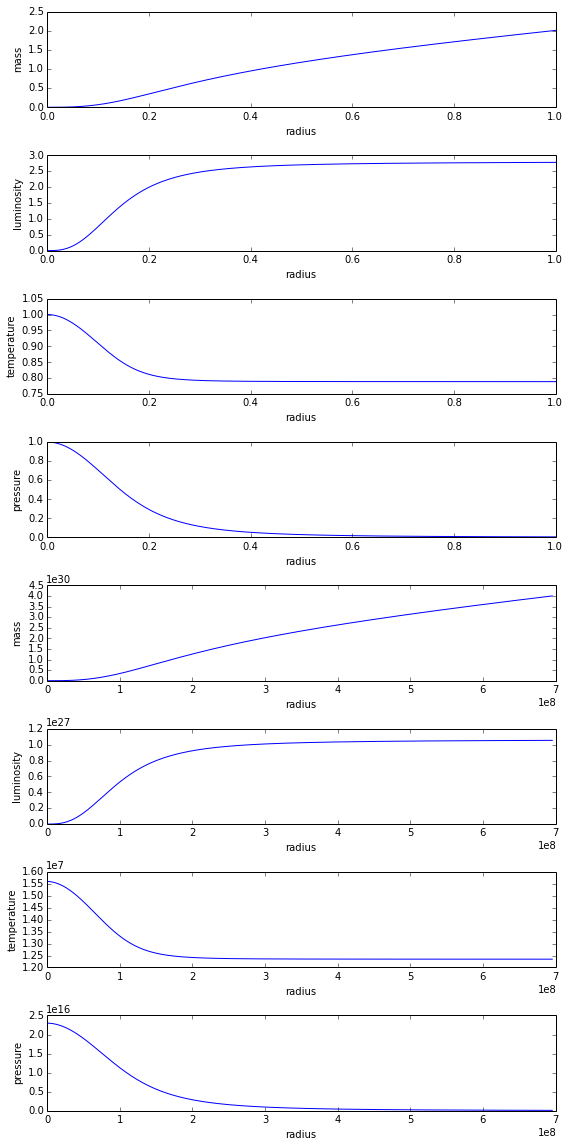

In [271]:
#Part g

pi = np.pi

def rho(y, r):
    #Pgas = R/mu*rho*T
    Mr, Lr, T, P = y
    X = 0.7
    Y = 0.28
    Z = 0.02
    a = 7.565e-16 #*u.J*u.m**-3*u.K**-4
    kb = const.k_B.value
    mH = 1.008*const.u.value
    R = kb/mH
    mu = 1.0/(2.0*X+0.75*Y+0.5*Z)
    Prad = (1.0/3.0)*a*(T**4.0)
    rho0 = (P-Prad)*mu/(R*T)
    #print P, Prad, T, rho0
    return rho0

def eps(y, r):
    Mr, Lr, T, P = y
    epp0 = 1.08e-12 #*u.W*u.m**3*u.kg**-2
    ecno0 = 8.24e-31 #*u.W*u.m**3*u.kg**-2
    rho0 = rho(y, r)
    XH = 0.64
    XCNO = 0.015
    epspp0 = epp0*rho0*XH*XH*((T/1e6)**4.0) #/u.K**4
    epscno0 = ecno0*rho0*XH*XCNO*((T/1e6)**19.9) #/u.K**4
    eps0 = epspp0+epscno0
    return eps0

def kappa(y, r):
    Mr, Lr, T, P = y
    X = 0.7
    Y = 0.28
    Z = 0.02
    gbft = 1.0 
    gff = 1.0
    kbf = (4.3e21)*gbft*Z*0.1*(1+X)*(rho(y, r))/(T**3.5) #*cm**2/g
    kff = (3.7e18)*gff*(1-Z)*(1+X)*(rho(y, r))/(T**3.5) #*cm**2/g
    ke = 0.2*(1.0+X)/10.0 #*cm**2/g
    kappa0 = (kbf+kff+ke)/3.0
    #return 0.03
    return kappa0



def dMdr(y, r):
    Mr, Lr, T, P = y
    dMdr0 = 4.0*pi*r*r*rho(y, r)
    return dMdr0

def dLdr(y, r):
    Mr, Lr, T, P = y
    dLdr0 = 4.0*pi*r*r*rho(y, r)*eps(y, r)
    return dLdr0

def dTdr(y, r):
    Mr, Lr, T, P = y
    #rho0 = rho(y, r)
    #kappa0 = kappa(y, r)
    a = 7.565e-16 #*u.J*u.m**-3*u.K**-4
    dTdr0 = (-3.0/(4.0*a*const.c.value))*(((kappa(y, r))*(rho(y, r)))/(T**3.0))*(Lr/(4.0*pi*r*r))
    #return 0
    return dTdr0

def dPdr(y, r):
    Mr, Lr, T, P = y
    dPdr0 = -const.G.value*Mr*rho(y, r)/(r*r)
    return dPdr0

def function(y, r):
    derivs = [dMdr(y, r), dLdr(y, r), dTdr(y, r), dPdr(y, r)]
    return derivs

T_center = 1.561e7 #*u.K
P_center = 23*1e15 #*u.PPa
y0 = [0.0, 0.0, T_center, P_center]
r0 = np.linspace(1, const.R_sun.value, 1000.0)
#r0 = np.logspace(7.0, np.log10(const.R_sun.value), num=10000)
Asol = odeint(function, y0, r0, mxstep = 100000)

Bsol = [[],[],[],[]]
dr = const.R_sun.value/1000.0
for i in r0:
    y0[0] += dMdr(y0, i)*dr
    Bsol[0].append(y0[0])
    y0[1] += dLdr(y0, i)*dr
    Bsol[1].append(y0[1])
    y0[2] += dTdr(y0, i)*dr
    Bsol[2].append(y0[2])
    y0[3] += dPdr(y0, i)*dr
    Bsol[3].append(y0[3])
    #print 'test', dMdr(y0, i), dLdr(y0, i), dTdr(y0, i), dPdr(y0, i),
#print Bsol[0], Bsol[1], Bsol[2], Bsol[3]
#print Asol


fig = plt.figure(1, figsize=(8,16))

ax1 = fig.add_subplot(811)
ax1.plot(r0/const.R_sun.value, Asol[:,0]/const.M_sun.value)
ax1.set_xlabel('radius')
ax1.set_ylabel('mass')
#ax1.set_ylim([0,1e5])

ax2 = fig.add_subplot(812)
ax2.plot(r0/const.R_sun.value, Asol[:,1]/const.L_sun.value)
ax2.set_xlabel('radius')
ax2.set_ylabel('luminosity')
#ax2.set_ylim([0,1e5])

ax3 = fig.add_subplot(813)
ax3.plot(r0/const.R_sun.value, Asol[:,2]/T_center)
ax3.set_xlabel('radius')
ax3.set_ylabel('temperature')
#ax3.set_ylim([0,1e5])

ax4 = fig.add_subplot(814)
ax4.plot(r0/const.R_sun.value, Asol[:,3]/P_center)
ax4.set_xlabel('radius')
ax4.set_ylabel('pressure')
#ax4.set_ylim([0,1e5])

ax5 = fig.add_subplot(815)
ax5.plot(r0, Bsol[0])
ax5.set_xlabel('radius')
ax5.set_ylabel('mass')
#ax1.set_ylim([0,1e5])

ax6 = fig.add_subplot(816)
ax6.plot(r0, Bsol[1])
ax6.set_xlabel('radius')
ax6.set_ylabel('luminosity')
#ax2.set_ylim([0,1e5])

ax7 = fig.add_subplot(817)
ax7.plot(r0, Bsol[2])
ax7.set_xlabel('radius')
ax7.set_ylabel('temperature')
#ax3.set_ylim([0,1e5])

ax8 = fig.add_subplot(818)
ax8.plot(r0, Bsol[3])
ax8.set_xlabel('radius')
ax8.set_ylabel('pressure')
#ax4.set_ylim([0,1e5])

plt.tight_layout()
plt.show()


In [273]:
#Part h

print 'The plots are shown at above.'
print 'The first four functions are plotted using odeint,'
print 'they are in units of one solar unit, for example, one solar mass.'
print 'The last four functions are plotted using for loops,'
print 'they are shown in SI units.'

The plots are shown at above.
The first four functions are plotted using odeint,
they are in units of one solar unit, for example, one solar mass.
The last four functions are plotted using for loops,
they are shown in SI units.


In [272]:
#Part i

print 'They are different, but not by a large scale.'
print 'The difference is mainly due to the approximations we make with all the constants.'
print 'When we add the derivatives over and over again, the uncertainty stacks up.'
print 'So although I am getting 2 solar masses, I believe it is within the acceptable range.'

They are different, but not by a large scale.
The difference is mainly due to the approximations we make with all the constants.
When we add the derivatives over and over again, the uncertainty stacks up.
So although I am getting 2 solar masses, I believe it is within the acceptable range.
